In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# data path 
in_data_path="./out/features"
# files names
nt_files_name=[]
bt_files_name=[]
# file name apena start with
file_name_prefix="nt_"
# data list features
bt_list_df_features=[]
nt_list_df_features=[]

In [4]:
bt_files_name=[f for f in os.listdir(in_data_path) if not f.startswith(file_name_prefix)]
nt_files_name=[f for f in os.listdir(in_data_path) if f.startswith(file_name_prefix)]

print("số file mẫu bình thường: ", len(bt_files_name))
print("số file mẫu ngưng thở: ", len(nt_files_name))

số file mẫu bình thường:  126
số file mẫu ngưng thở:  30


In [6]:
def listAllDfFromPath(in_path, start_prefix):
    df_list = []
    for file_name in os.listdir(in_path):
        if not file_name.startswith(start_prefix):
            continue

        df = pd.read_csv(f"{in_path}/{file_name}")
        df_list.append(df)

    return df_list

In [9]:
# read all df features tho binh thuong
bt_list_df_features=[]
bt_list_df_features = listAllDfFromPath(in_data_path, "bt_")

print(f"Số df features thở bình thường: {len(bt_list_df_features)}")

Số df features thở bình thường: 126


In [10]:
# read all df features ngung tho
nt_list_df_features=[]
nt_list_df_features = listAllDfFromPath(in_data_path, "nt_")

print(f"Số df features ngưng thở: {len(nt_list_df_features)}")

Số df features ngưng thở: 30


In [42]:
def plot4FeaturesOf2Df(list_df_features_bt, list_df_features_nt, col='ax'):
    min_len = min(len(list_df_features_bt), len(list_df_features_nt))

    bt_min_df = pd.DataFrame(columns=['ax', 'ay', 'az', 'gx', 'gy', 'gz'])
    nt_min_df = pd.DataFrame(columns=['ax', 'ay', 'az', 'gx', 'gy', 'gz'])

    for i in range(min_len):
        df_bt = list_df_features_bt[i]
        df_nt = list_df_features_nt[i]

        bt_min_df.loc[i] = [df_bt['min'][0], 
                              df_bt['min'][1], 
                              df_bt['min'][2], 
                              df_bt['min'][3], 
                              df_bt['min'][4], 
                              df_bt['min'][5]]
        
        nt_min_df.loc[i] = [df_nt['min'][0], 
                              df_nt['min'][1], 
                              df_nt['min'][2], 
                              df_nt['min'][3], 
                              df_nt['min'][4], 
                              df_nt['min'][5]]
        
    for label in bt_min_df.columns:
        plt.plot(bt_min_df[label], color="red")
        plt.plot(nt_min_df[label], color="blue")
        plt.show()
    




In [54]:
def plot4FeaturesOf2Df2(list_df_features_bt, list_df_features_nt, colIdx=0, features="min"):
    colIdxLables = ["ax", 'ay', 'az', 'gx', 'gy', 'gz']
    min_len = min(len(list_df_features_bt), len(list_df_features_nt))

    bt_min_list = []
    nt_min_list = []

    for i in range(min_len):
        df_bt = list_df_features_bt[i]
        df_nt = list_df_features_nt[i]

        bt_min_list.append(df_bt[features][colIdx])
        nt_min_list.append(df_nt[features][colIdx])
        
    plt.plot(bt_min_list, color="red", label="bt")
    plt.plot(nt_min_list, color="blue", label="nt")
    plt.legend()
    plt.title(f'{features} of {colIdxLables[colIdx]}')
    plt.show()
       
    




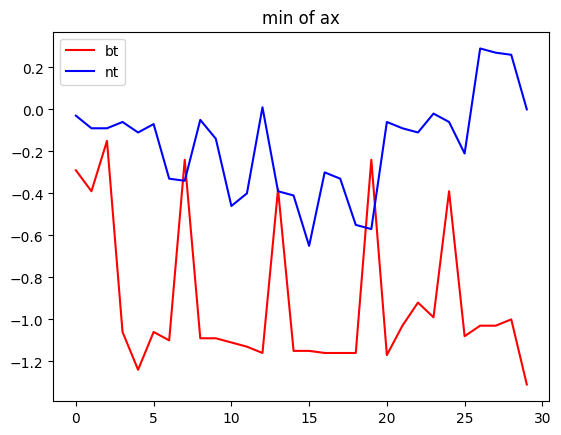

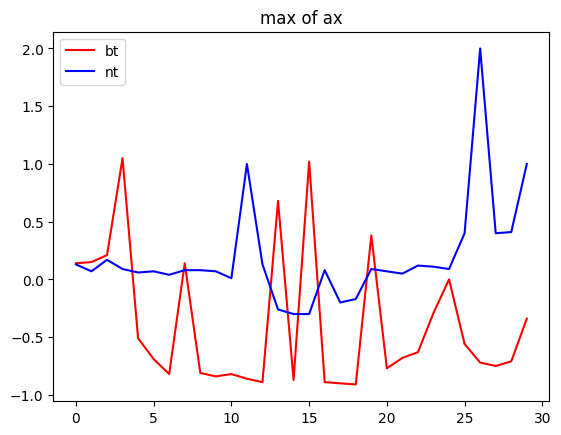

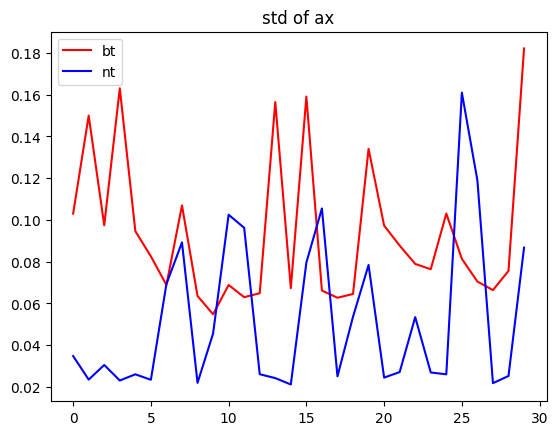

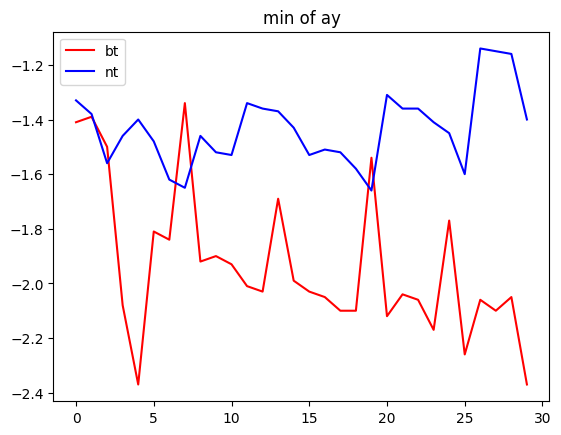

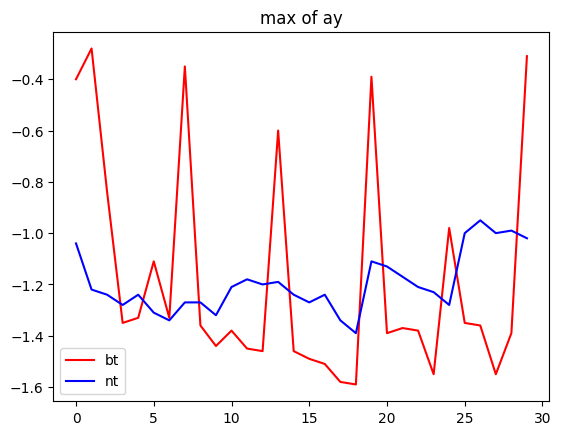

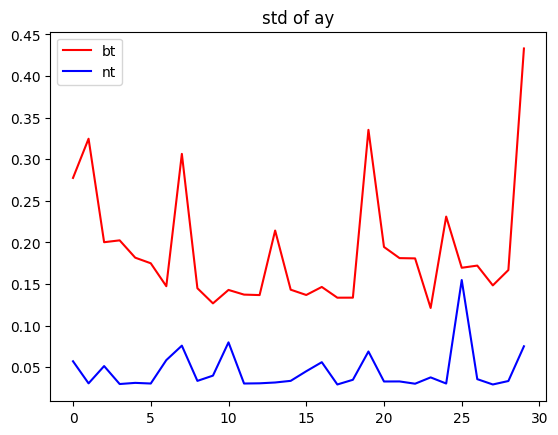

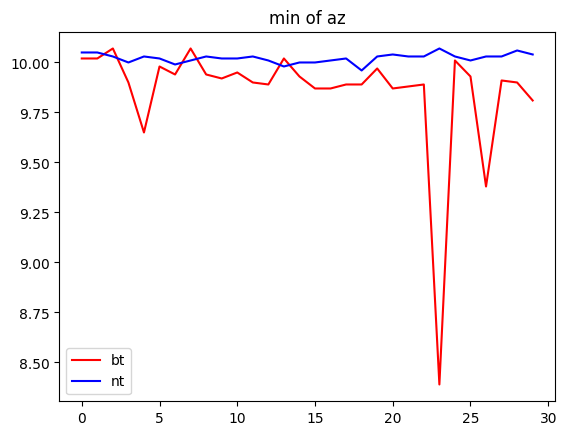

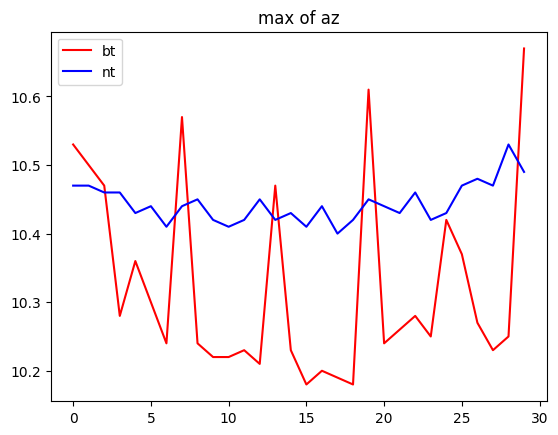

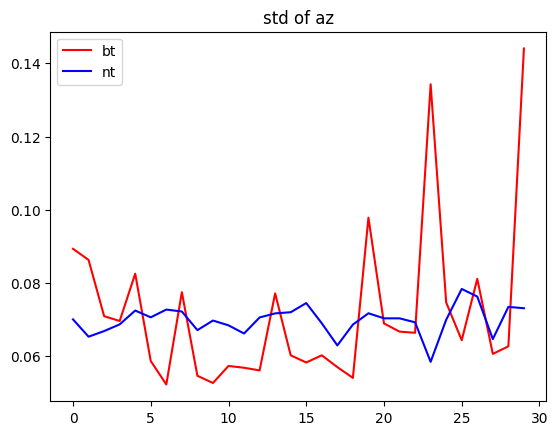

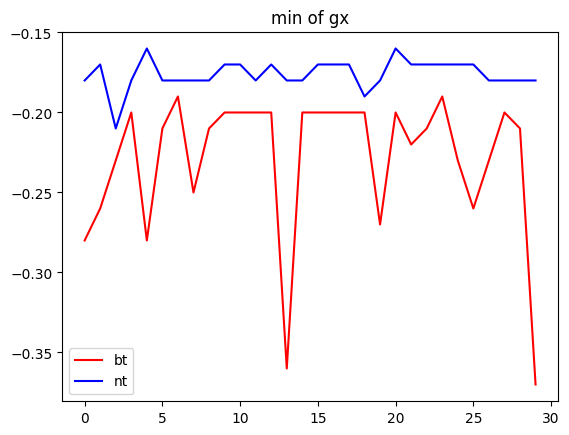

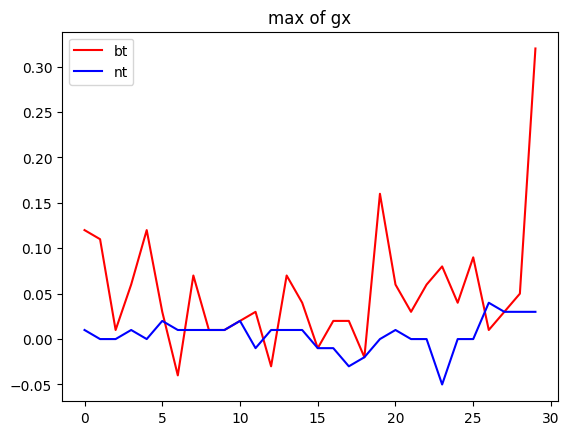

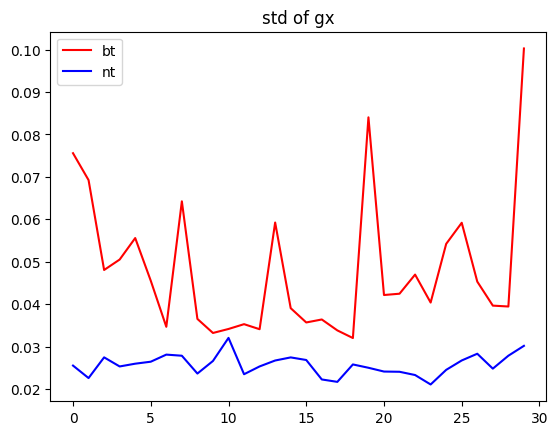

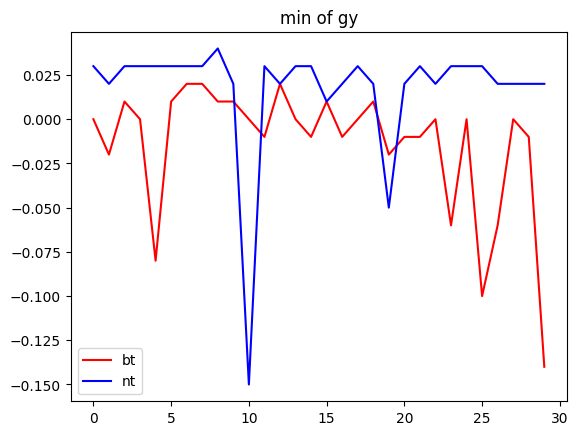

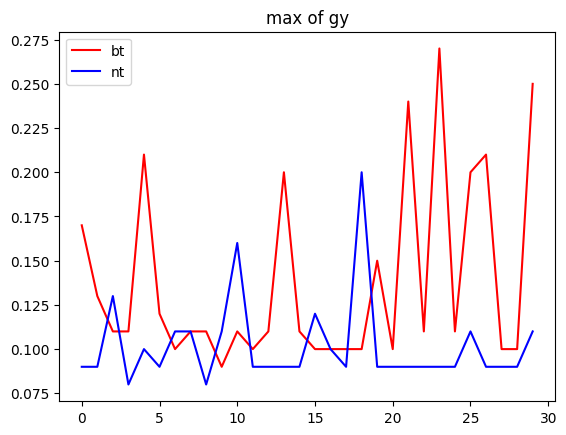

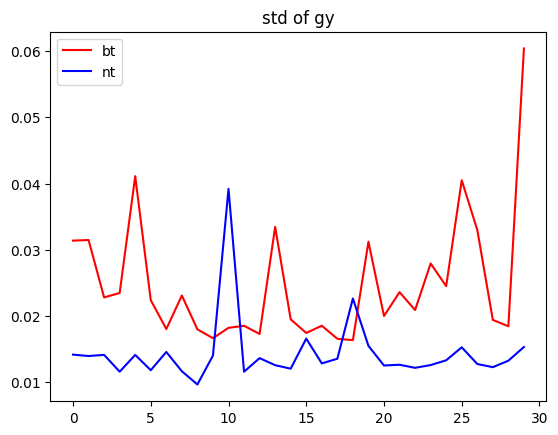

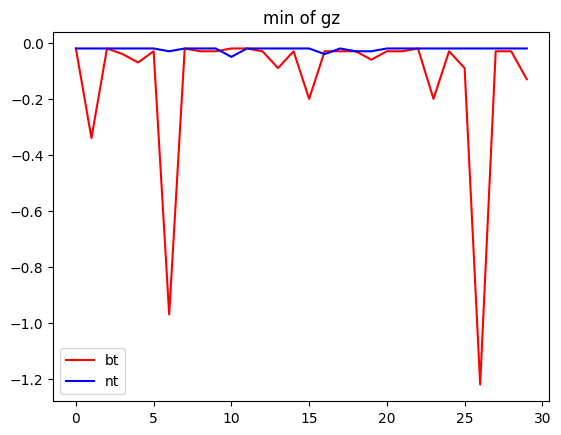

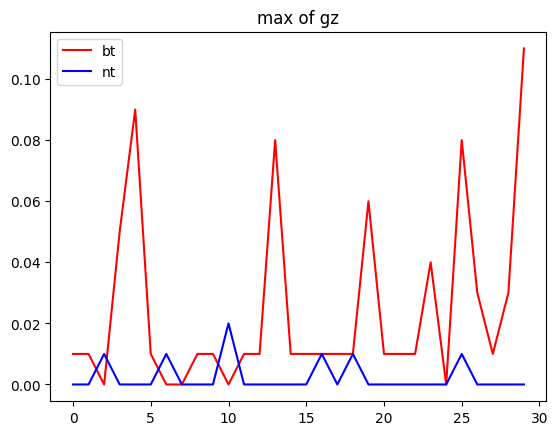

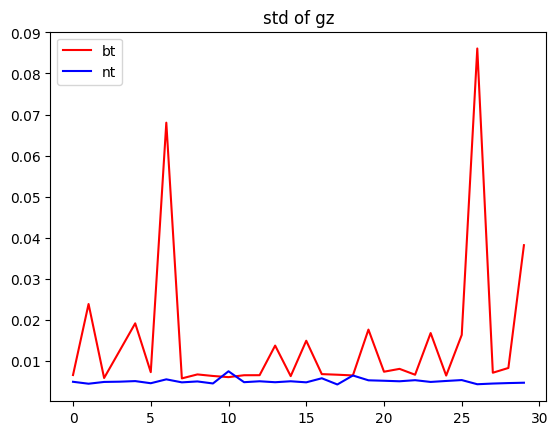

In [61]:
for col in range(6):
    for features in ['min', 'max','std']:
        plot4FeaturesOf2Df2(bt_list_df_features, nt_list_df_features, col, features)
